In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random_hyperplanes import synthetic_data, simulations

%matplotlib inline

In [2]:
# Parameters for each classifier
N_ESTIMATORS = 100
SCORE_AT = 95.0

num_points = 1000
contamination = 0.025
n_anomalies = [int(num_points * contamination)]

# The desired covariance matrices.
cov_1 = np.array([
    [1.0, -1.175],
    [-1.0, 1.250]
])

cov_2 = np.array([
    [1.0, 1.175],
    [1.0, 1.250]
])

mean_1 =    [ -1.0,   0.0]
mean_2 =    [  1.0,   0.0]

covs = [cov_1, cov_2]
means = [mean_1, mean_2]
mean_anon = [[ -2.5,  -2.5]]

cov_anon = [np.array([
    [ 0.10, 0.0],
    [ 0.0, 0.10]
])]

split = int(num_points / 2)
n_points = [split, split]

X, X_anon = simulations.correlated_simulation_data(
    anon_covs=cov_anon, 
    anon_means=mean_anon, 
    anon_n_points=n_anomalies,
    n_points=n_points,
    means=means,
    covs=covs,
)

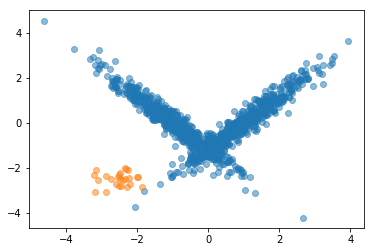

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.scatter(X_anon[:, 0], X_anon[:, 1], alpha=0.5)
plt.show()

In [ ]:
simulations.run_comparison_simul(
    X=X, 
    X_anon=X_anon, 
    n_estimators=N_ESTIMATORS, 
    score_at=SCORE_AT
)

Running iteration 1
